<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Assignment/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default state of the Python script and needed functions

*It is important to run these code snippets before other*

In [37]:
# For transfer function and checking the values obtained during transformation SS -> TF
from scipy.signal import ss2tf
from scipy.signal.ltisys import TransferFunction
# For LQR method
from scipy.linalg import solve_continuous_are
# For pole placement method
from scipy.signal import place_poles
from sympy.printing.latex import latex, print_latex, multiline_latex
# For basic calculations
import numpy as np
import sympy as sp
sp.init_printing()
from numpy.linalg import eig  # Eigenvalues
# For integration
from scipy.integrate import odeint


C:\Users\newro\AppData\Local\Temp\ipykernel_23064\81230711.py:3: DeprecationWarning: Please use `TransferFunction` from the `scipy.signal` namespace, the `scipy.signal.ltisys` namespace is deprecated.
  from scipy.signal.ltisys import TransferFunction


In [38]:
# x_dot from state space with constant U
def dxdt(x, t, A, B, u):
  return A.dot(x) + B.dot(u)

In [39]:
# For plotting exactly one plot
from matplotlib.pyplot import *

def plot1(t, sol, title_str=''):
  subplot(121)
  plot(t, sol)
  if title_str:
    title(title_str)
  grid(True)
  xlabel('Time $t$')
  ylabel('State $x(t)$')
  show()

In [40]:
# sympy rounding for expressions
# source: https://stackoverflow.com/a/60284977
def round_expr(expr, num_digits):
     return expr.xreplace({n.evalf() : n if type(n)==int else sp.Float(n, num_digits) for n in expr.atoms(sp.Number)}) 

In [41]:
# my number
n = 20

# Task 1 (5 points)

Given a system for $n = 20$:

<!-- A = 
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
20 & -2 & -0.5 & -2 \\
-5 & -2 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).


1. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.


1. Find Lyapunov function that proves the system's stability (one for continious time and one discrete time versions).






1.   Find its transfer function representation ($y(s) / u(s) = W(s)$).

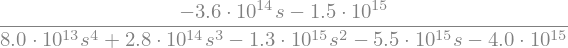

In [42]:
# Solution using sympy and straightforward algorithm
A = sp.Matrix([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])
B = sp.Matrix([[0],
              [0],
              [-1],
              [1]])
C = sp.Matrix([[1, 1, 0, 0]])
D = sp.Matrix([[0]])
s, t = sp.symbols('s, t')
Ys = round_expr(sp.simplify(C * (s * sp.eye(4) - A).inv() * B + D), 2)[0]
Ys


In [43]:
# Solution using scipy
A = [[0, 0, 1, 0],
      [0, 0, 0, 1],
      [n, -2, -10/n, -2],
      [-5, -n/10, 0, -3]]
B = [[0],
    [0],
    [-1],
    [1]]
C = [[1, 1, 0, 0]]
D = 0
tf = ss2tf(A, B, C, D)
W = ss2tf(A, B, C, D)
tf

(array([[ 0.00000000e+00,  0.00000000e+00,  5.68434189e-14,
         -4.50000000e+00, -1.90000000e+01]]),
 array([  1. ,   3.5, -16.5, -69. , -50. ]))

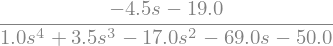

In [44]:
# Matching coefficients with straightforward algorithm and scipy
num, den = sp.fraction(Ys)
num = round_expr(num * (4.5) / (3.6 * 10**14), 2)
den = round_expr(den * (4.5) / (3.6 * 10**14), 2)
tf = num/den
tf

_Remark_: for some reason [Wolframalpha return](https://www.wolframalpha.com/input?i=A%3A+%5B%2F%2Fmath%3A%7B%7B0%2C+0%2C+1%2C+0%7D%2C%7B0%2C+0%2C+0%2C+1%7D%2C%7B20%2C+-2%2C+-0.5%2C+-2%7D%2C%7B5%2C+-2%2C+0%2C+-3%7D%7D%2F%2F%5D+B%3A+%5B%2F%2Fmath%3A%7B%7B0%7D%2C%7B0%7D%2C+%7B-1%7D%2C%7B1%7D%7D%2F%2F%5D+C%3A+%5B%2F%2Fmath%3A%7B%7B1%2C1%2C+0%2C0%7D%7D+%2F%2F%5D+D%3A%5B%2F%2Fmath%3A%7B%7B0%7D%7D%2F%2F%5D) a bit different result, but since the results of straightforward algorithm and scipy are matched I will not use the result of Wolframalpha.

2.   Propose an ODE representation of the system.


In [45]:
def invL(F):
    return sp.inverse_laplace_transform(F, s, t)
print_latex(invL(num))
print_latex(invL(den))


- 4.5 \mathcal{L}^{-1}_{s}\left[s\right]\left(t\right) - 19.0 \delta\left(t\right)
- 69.0 \mathcal{L}^{-1}_{s}\left[s\right]\left(t\right) - 17.0 \mathcal{L}^{-1}_{s}\left[s^{2}\right]\left(t\right) + 3.5 \mathcal{L}^{-1}_{s}\left[s^{3}\right]\left(t\right) + 1.0 \mathcal{L}^{-1}_{s}\left[s^{4}\right]\left(t\right) - 50.0 \delta\left(t\right)


Numerator: $4.5 \mathcal{L}^{-1}_{s}\left[s\right]\left(t\right) + 19.0 \delta\left(t\right)$

Denominator: $69.0 \mathcal{L}^{-1}_{s}\left[s\right]\left(t\right) + 17.0 \mathcal{L}^{-1}_{s}\left[s^{2}\right]\left(t\right) - 3.5 \mathcal{L}^{-1}_{s}\left[s^{3}\right]\left(t\right) - 1.0 \mathcal{L}^{-1}_{s}\left[s^{4}\right]\left(t\right) + 50.0 \delta\left(t\right)$

ODE form:

$$ y^{[4]} + 3.5y^{[3]} - 17 \ddot y - 69 \dot y - 50 y = - 4.5 \dot u - 19u$$

3. Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.


**Pole placement method**

$$ 
\begin{cases}
\mathbf{\dot{x}} = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
20 & -2 & -0.5 & -2 \\
-5 & -2 & 0 & -3
\end{bmatrix}
\mathbf{x}
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
\mathbf{u} \\
\mathbf{u} = -\mathbf{K}\mathbf{x}=-\begin{bmatrix}
k_1 & k_2 & k_3 & k_4
\end{bmatrix}\mathbf{x}
\end{cases}
$$

$$
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}=\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
k_1+20 & k_2-2 & k_3-0.5 & k_4-2\\
-k_1-5 & -k_2-2 & -k_3 & -k_4-3
\end{bmatrix}$$

$$
\det \left(\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
k_1+20 & k_2-2 & k_3-0.5 & k_4-2\\
-k_1-5 & -k_2-2 & -k_3 & -k_4-3
\end{bmatrix} - \begin{bmatrix} \lambda & 0 & 0 & 0\\ 
0 & \lambda & 0 & 0\\
0 & 0 & \lambda & 0\\
0 & 0 & 0 & \lambda\\
\end{bmatrix} \right)=0
$$

Solving the equation leads to four lambda roots. 
The system will be stable if $\operatorname{Re}{\lambda_i} < 0$. Let's assume that $\lambda_1=-1$, $\lambda_2=-2$, $\lambda_3=-3$, $\lambda_4=-4$ which we will call poles.

In [46]:
# Pole placement
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
P_pp = np.array([-1, -2, -3, -4])

pp = place_poles(A, B, P_pp)

K_pp = pp.gain_matrix
print(f"Calculated gains:\n{K_pp}\n")
# verifying eigenvalues
Lambda, Q = eig(A - B.dot(K_pp))
print(f"Eigen values:\n{Lambda}")


Calculated gains:
[[-26.    2.   -4.5   2. ]]

Eigen values:
[-1. -2. -3. -4.]


Control law is following:
$$u = -\begin{bmatrix}
-26 & 2 & -4.5 & 2
\end{bmatrix}\mathbf{x}$$

**Linear quadratic regulator (LQR) method**

I choose the following cost functions:

performace (state): 
$$ Q = 
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 4
\end{bmatrix}
$$
energy (input):
$$
R = 
\begin{bmatrix} 
10
\end{bmatrix}
$$

In [47]:
# LQR
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
Q = np.array([[1, 0, 0, 0],
              [0, 2, 0, 0],
              [0, 0, 3, 0],
              [0, 0, 0, 4]])
R = np.array([[10]])
P_lqr = solve_continuous_are(A, B, Q, R)
K_lqr = (np.linalg.inv(R).dot(B.transpose())).dot(P_lqr)
P = round_expr(sp.Matrix(P_lqr), 2)
K = round_expr(sp.Matrix(K_lqr), 2)
print(r'P = ' + latex(P))
print(r'K = ' + latex(P))


P = \left[\begin{matrix}1.2 \cdot 10^{3} & -78.0 & 2.5 \cdot 10^{2} & -77.0\\-78.0 & 8.0 & -16.0 & 5.2\\2.5 \cdot 10^{2} & -16.0 & 52.0 & -16.0\\-77.0 & 5.2 & -16.0 & 5.4\end{matrix}\right]
K = \left[\begin{matrix}1.2 \cdot 10^{3} & -78.0 & 2.5 \cdot 10^{2} & -77.0\\-78.0 & 8.0 & -16.0 & 5.2\\2.5 \cdot 10^{2} & -16.0 & 52.0 & -16.0\\-77.0 & 5.2 & -16.0 & 5.4\end{matrix}\right]


$$
P = \begin{bmatrix}1.2 \cdot 10^{3} & -78.0 & 2.5 \cdot 10^{2} & -77.0\\-78.0 & 8.0 & -16.0 & 5.2\\2.5 \cdot 10^{2} & -16.0 & 52.0 & -16.0\\-77.0 & 5.2 & -16.0 & 5.4\end{bmatrix}
$$

$$
K = \begin{bmatrix}-33.0 & 2.1 & -6.8 & 2.1\end{bmatrix}
$$

Control law is following:
$$u = -\begin{bmatrix}-33.0 & 2.1 & -6.8 & 2.1\end{bmatrix}\mathbf{x}$$

4.   Show stability of the closed-loop system via eigenvalue analysis.

Using pole placement method we have already know that real part of eigenvalues is negative, so the system is stable.

Let's compute eigenvalues for obtained control low from LQR method:

In [49]:
A_c = A - B.dot(K_lqr)
l, v = eig(A_c)
print(r'\mathbf{\lambda} = ' + latex(round_expr(sp.Matrix(l), 2)))

\mathbf{\lambda} = \left[\begin{matrix}-0.99\\-2.7\\-4.5\\-4.1\end{matrix}\right]


$$
\mathbf{\lambda} = \begin{bmatrix}-0.99\\-2.7\\-4.5\\-4.1\end{bmatrix}
$$
So, again real part of eigenvalues is negative, so the system is stable.

5. Find stability margins by analysing Bode diagram for the system.


C:\Users\newro\AppData\Roaming\Python\Python39\site-packages\scipy\signal\_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


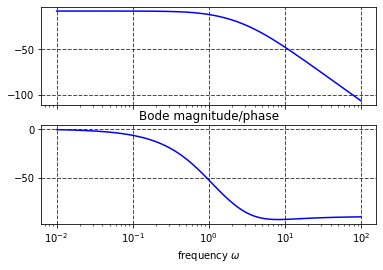

In [50]:
sys = TransferFunction(W[0], W[1])
w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
title('Bode magnitude/phase')
ax1.semilogx(w, mag, color="blue")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
ax1.grid(True)

ax2.semilogx(w, phase, color="blue")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
ax2.grid(True)
xlabel(r'frequency ${\omega}$')
show()


(-4.5*s - 19.0)/(1.0*s**4 + 3.5*s**3 - 17.0*s**2 - 69.0*s - 50.0)


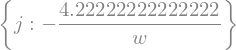

In [51]:
# computing bode plot values using transfer function
print(tf)
# substituting s = jw:
j = sp.symbols('j', imaginary=True)
w = sp.symbols('w')
tf_sol = sp.solve((-4.5*(j * w) - 19.0)/(1.0*(j * w)**4 + 3.5*(j * w)**3 -
         17.0*(j * w)**2 - 69.0*j*w - 50.0))[0]
tf_sol


So, $w = 0 + 4.2j$. Therefore, using complex plane representation we can obtain the following:

- As $\omega \rightarrow 0$, the magnitude and the phase approach $0$.
- As $\omega \rightarrow \infty$, the magnitude approaches $-\infty$, while the phase approaches $-90^\degree$.

Also, the phase margin is around $90\degree$ and gain margin is around $40dB$.

6. Simulate closed-loop system.

Simulation of the system with control. Comparison of Pole placement and LQR methods also provided.

[2.65000000e+01 2.62089928e+01 2.59212394e+01 ... 4.21581881e-08
 4.17390834e-08 4.13240502e-08]


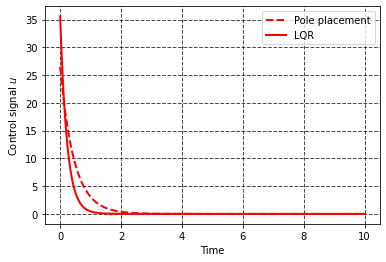

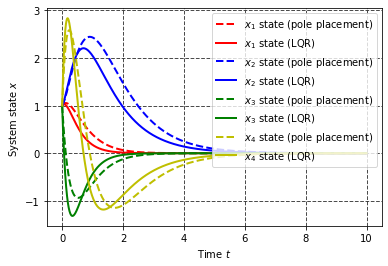

In [58]:
def control(x, K):
  u = -np.dot(K, x)
  return u


def system_ode(x, t, A, B, K):
    u = control(x, K)
    dx = np.dot(A, x) + np.dot(B, u)
    return dx

def calculate_control(t, x_sol, K):
  u = np.zeros(t.shape)
  for i in range(len(t)):
    u[i] = control(x_sol[i], K)
  return u


t0 = 0  # Initial time
tf = 10  # Final time
N = int(2E3)  # Numbers of points in time span
t = np.linspace(t0, tf, N)  # Create time span
x0 = np.array([1, 1, 1, 1])

A = np.array([[0, 0, 1, 0],
     [0, 0, 0, 1],
     [n, -2, -10/n, -2],
     [-5, -n/10, 0, -3]])
B = np.array([[0],
     [0],
     [-1],
     [1]])
C = np.array([[1, 1, 0, 0]])
D = np.array([[0]])



# Pole placement
x_sol_pp = odeint(system_ode, x0, t, args=(A, B, K_pp))
u_pp = calculate_control(t, x_sol_pp, K_pp)
print(u_pp)

# LQR
x_sol_lqr = odeint(system_ode, x0, t, args=(A, B, K_lqr))
u_lqr = calculate_control(t, x_sol_lqr, K_lqr)

plot(t, u_pp, 'r', linestyle='--', linewidth=2., label=r'Pole placement')
plot(t, u_lqr, 'r', linewidth=2., label=r'LQR')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
ylabel(r'Control signal $u$')
xlabel(r'Time $t$')
show()

plot(t, x_sol_pp[:, 0], 'r', linestyle='--',
     linewidth=2., label=r'$x_1$ state (pole placement)')
plot(t, x_sol_lqr[:, 0], 'r', linewidth=2., label=r'$x_1$ state (LQR)')
plot(t, x_sol_pp[:, 1], 'b', linestyle='--',
     linewidth=2., label=r'$x_2$ state (pole placement)')
plot(t, x_sol_lqr[:, 1], 'b', linewidth=2., label=r'$x_2$ state (LQR)')
plot(t, x_sol_pp[:, 2], 'g', linestyle='--',
     linewidth=2., label=r'$x_3$ state (pole placement)')
plot(t, x_sol_lqr[:, 2], 'g', linewidth=2., label=r'$x_3$ state (LQR)')
plot(t, x_sol_pp[:, 3], 'y', linestyle='--',
     linewidth=2., label=r'$x_4$ state (pole placement)')
plot(t, x_sol_lqr[:, 3], 'y', linewidth=2., label=r'$x_4$ state (LQR)')
legend(loc='upper right')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()


7. Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix} (2+0.1n)/(n-5) \\ 1 \\ 0 \\ 0 \end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.

For $n = 20$: $x_0 = \begin{bmatrix} 4/15 \\ 1 \\ 0 \\ 0 \end{bmatrix}$. I will use $K$ from LQR method.

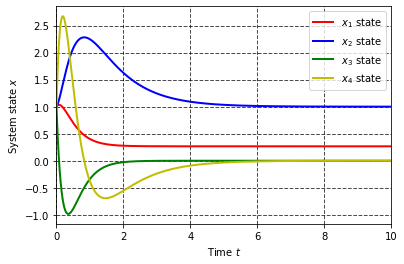

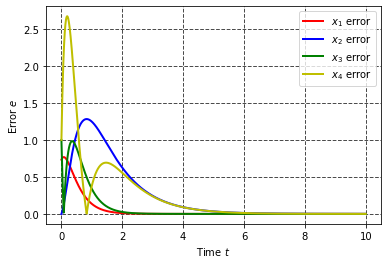

In [77]:
def trajectory():
  x_des = np.array([(2+0.1*n)/(n-5), 1, 0, 0])
  dx_des = np.array([0, 0, 0, 0])
  return x_des, dx_des


def StateSpace_trajectory(x, t, A, B, K):
  x_des, dx_des = trajectory()
  u_ff = np.linalg.pinv(B) @ (dx_des - A @ x_des)
  u_fb = - K @ (x-x_des)
  u = u_fb + u_ff
  return A @ x + B @ u

t0 = 0  # Initial time
tf = 10  # Final time
N = int(2E3)  # Numbers of points in time span
t = np.linspace(t0, tf, N)  # Create time span
x0 = np.array([1, 1, 1, 1])

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
C = np.array([[1, 1, 0, 0]])
D = np.array([[0]])

x0 = np.array([1, 1, 1, 1])
x_des = np.array([(2+0.1*n)/(n-5), 1, 0, 0])

x_sol = odeint(StateSpace_trajectory, x0, t, args=(A, B, K_lqr))

plot(t, x_sol[:, 0], 'r', linewidth=2.0, label=r'$x_1$ state')
plot(t, x_sol[:, 1], 'b', linewidth=2.0, label=r'$x_2$ state')
plot(t, x_sol[:, 2], 'g', linewidth=2.0, label=r'$x_3$ state')
plot(t, x_sol[:, 3], 'y', linewidth=2.0, label=r'$x_4$ state')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()

plot(t, np.abs(x_sol[:, 0] - x_des[0]), 'r', linewidth=2., label=r'$x_1$ error')
plot(t, np.abs(x_sol[:, 1] - x_des[1]), 'b', linewidth=2., label=r'$x_2$ error')
plot(t, np.abs(x_sol[:, 2] - x_des[2]), 'g', linewidth=2., label=r'$x_3$ error')
plot(t, np.abs(x_sol[:, 3] - x_des[3]), 'y', linewidth=2., label=r'$x_4$ error')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
ylabel(r'Error $e$')
xlabel(r'Time $t$')
show()


8. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dynamics.
$$\Delta t = T = 0.01$$
$$
\begin{cases} 
\mathbf{x} [(k+1)T] = \mathbf{A_dx} [kT] + \mathbf{B_du} [kT]\\
\mathbf{y} [kT] = \mathbf{C_dx} [kT] + \mathbf{D_du} [kT]
\end{cases} 
$$
where
*   $\mathbf{A_d} = (I + T\mathbf{A})$
*   $\mathbf{B_d} = T\mathbf{B}$
*   $\mathbf{C_d} = \mathbf{C}$
*   $\mathbf{D_d} = \mathbf{D}$
$$ 
\begin{cases}
\mathbf{x} [(k+1)T] = 
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
0.2 & -0.02 & 0.995 & -0.02 \\
-0.05 & -0.02 & 0 & 0.97
\end{bmatrix}
\mathbf{x} [kT]
+ 
\begin{bmatrix} 
0 \\
0 \\
-0.01\\
0.01
\end{bmatrix}
\mathbf{u} [kT] \\
\mathbf{y} [kT] = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} \mathbf{x} [kT]
\end{cases}
$$


9. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).

**Pole placement method**

$$ 
\begin{cases}
\mathbf{x} [(k+1)T] = 
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
0.2 & -0.02 & 0.995 & -0.02 \\
-0.05 & -0.02 & 0 & 0.97
\end{bmatrix}
\mathbf{x} [kT]
+ 
\begin{bmatrix} 
0 \\
0 \\
-0.01\\
0.01
\end{bmatrix}
\mathbf{u} [kT] \\
\mathbf{u} [kT] =- \mathbf{Kx} [kT]= - \begin{bmatrix}
k_1 & k_2 & k_3 & k_4
\end{bmatrix} \mathbf{x} [kT]
\end{cases}
$$

$$
\mathbf{x} [(k+1)T]=(\mathbf{A_d} - \mathbf{B_d}\mathbf{K})\mathbf{x}[kT] =\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
k_1+20 & k_2-2 & k_3-0.5 & k_4-2\\
-k_1-5 & -k_2-2 & -k_3 & -k_4-3
\end{bmatrix}$$

$$
\det \left(\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
k_1+20 & k_2-2 & k_3-0.5 & k_4-2\\
-k_1-5 & -k_2-2 & -k_3 & -k_4-3
\end{bmatrix} - \begin{bmatrix} \lambda & 0 & 0 & 0\\ 
0 & \lambda & 0 & 0\\
0 & 0 & \lambda & 0\\
0 & 0 & 0 & \lambda\\
\end{bmatrix} \right)=0
$$

Solving the equation leads to four lambda roots. 
The system will be stable if $\operatorname{Re}{\lambda_i} < 0$. Let's assume that $\lambda_1=-1$, $\lambda_2=-2$, $\lambda_3=-3$, $\lambda_4=-4$ which we will call poles.

In [96]:
k1, k2, k3, k4 = sp.symbols('k1 k2 k3 k4')
T = 0.01
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])
A_d = np.eye(4) + T * A
B_d = T * B
K = np.array([k1, k2, k3, k4])
(A_d - B_d @ K)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

11. Simulate the discrete system. Show graphs.

I will use $K$ from LQR method.

[[ 1.     0.     0.01   0.   ]
 [ 0.     1.     0.     0.01 ]
 [ 0.2   -0.02   0.995 -0.02 ]
 [-0.05  -0.02   0.     0.97 ]] [[ 0.  ]
 [ 0.  ]
 [-0.01]
 [ 0.01]]


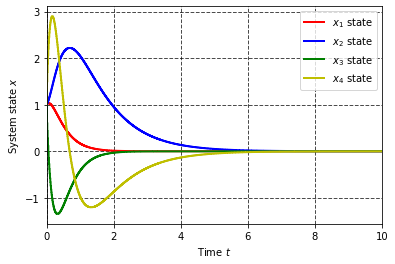

In [94]:
t0 = 0  # Initial time
tf = 10  # Final time
T = 0.01  # Discretization step
t = np.arange(t0, tf, T)  # Create time span

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [n, -2, -10/n, -2],
              [-5, -n/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

x0 = np.array([1, 1, 1, 1])

x_d = x0
x_disc = x0

A_d = np.eye(4) + T * A
B_d = T * B
# print(A_d, B_d)
for time in t:
  u_d = - K_lqr @ x_d
  x_d = A_d @ x_d + B_d @ u_d
  x_disc = np.vstack((x_disc, x_d))

t_disc = np.insert(t, 0, 0)

step(t_disc, x_disc[:, 0], 'r', linewidth=2.0, label=r'$x_1$ state')
step(t_disc, x_disc[:, 1], 'b', linewidth=2.0, label=r'$x_2$ state')
step(t_disc, x_disc[:, 2], 'g', linewidth=2.0, label=r'$x_3$ state')
step(t_disc, x_disc[:, 3], 'y', linewidth=2.0, label=r'$x_4$ state')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()

# Task 2 (4 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
1 & 5 & -2 \\
2 & 1 & -3 \\
-1 & -2 & 7
\end{bmatrix}
x
+ 
\begin{bmatrix} 
2 \\
1 \\
0
\end{bmatrix}
u \\
u = -\begin{bmatrix} 
7k & 6k & -50k
\end{bmatrix} x
\end{cases}
$$

1. How do the eigenvalues of the closed-loop system depend on k? Plot the evolution of the eigenvalues on a complex plane, as $k$ changes from 0 to 5. 
1. Chose a value of $k$ that allows the system to be stable. USe bode plot to find stability margins of teh closed-loop system.
1. Discretize the closed-loop system with $\Delta t = 0.05$ and simulate both the continues-time and discrete-time versions, show if there is a difference between simulation results.
1. What is the smallest value of $k$ that makes the eigenvalues purely real?

# Task 3 (3 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
1
\end{bmatrix}
u \\
u = 
-\begin{bmatrix} 
5k & k
\end{bmatrix} x
\end{cases}
$$

You can chose any positive value of $k$ to design your controller. What is least-norm control gain (control gain is the matrix $\begin{bmatrix} 5k & k \end{bmatrix}$) that makes the system not only be stable, but also exhibit no oscillations in the transient process?